In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/raisin.csv')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns :
    df[i] = le.fit_transform(df[i])

In [37]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1


In [38]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

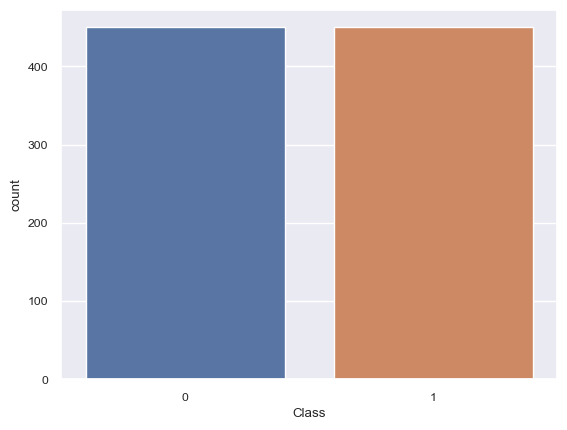

In [39]:
import seaborn as sns
sns.countplot(data=df,x="Class")

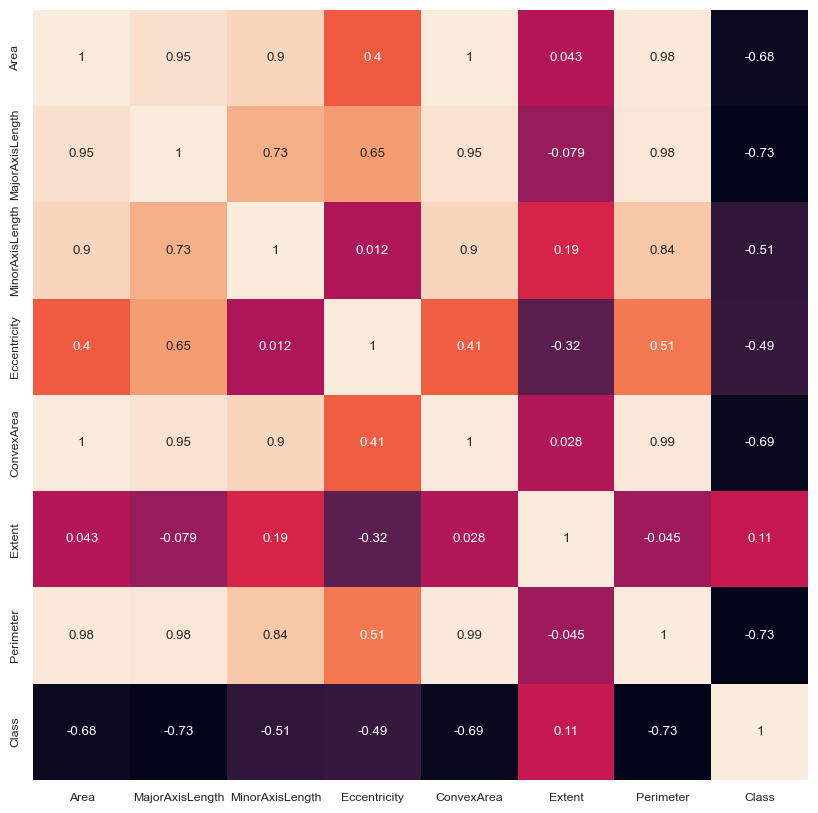

In [40]:
import matplotlib.pyplot as plt
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [41]:
X = df.drop('Class', axis=1)
X = X.to_numpy()
y = df['Class']

In [42]:
from keras.utils import to_categorical
y = to_categorical(y)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(80,input_shape=(7,),activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 80)                640       
                                                                 
 dense_17 (Dense)            (None, 40)                3240      
                                                                 
 dense_18 (Dense)            (None, 20)                820       
                                                                 
 dense_19 (Dense)            (None, 2)                 42        
                                                                 
Total params: 4,742
Trainable params: 4,742
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 0s 3ms/step - loss: 18.2654 - accuracy: 0.6264 - val_loss: 0.5715 - val_accuracy: 0.5722
Epoch 2/100
23/23 [==============================] - 0s 860us/step - loss: 0.5550 - accuracy: 0.7278 - val_loss: 0.4156 - val_accuracy: 0.8389
Epoch 3/100
23/23 [==============================] - 0s 834us/step - loss: 0.4675 - accuracy: 0.8264 - val_loss: 0.4126 - val_accuracy: 0.8278
Epoch 4/100
23/23 [==============================] - 0s 875us/step - loss: 0.4402 - accuracy: 0.8319 - val_loss: 0.3695 - val_accuracy: 0.8389
Epoch 5/100
23/23 [==============================] - 0s 839us/step - loss: 0.3977 - accuracy: 0.8389 - val_loss: 0.4007 - val_accuracy: 0.8222
Epoch 6/100
23/23 [==============================] - 0s 881us/step - loss: 0.3979 - accuracy: 0.8250 - val_loss: 0.3269 - val_accuracy: 0.8833
Epoch 7/100
23/23 [==============================] - 0s 874us/step - loss: 0.3671 - accuracy: 0.8556 - val_loss: 0.3205 - val_accuracy: 0.8778


Epoch 58/100
23/23 [==============================] - 0s 869us/step - loss: 0.3587 - accuracy: 0.8597 - val_loss: 0.3079 - val_accuracy: 0.8833
Epoch 59/100
23/23 [==============================] - 0s 971us/step - loss: 0.3780 - accuracy: 0.8514 - val_loss: 0.3255 - val_accuracy: 0.8611
Epoch 60/100
23/23 [==============================] - 0s 852us/step - loss: 0.3442 - accuracy: 0.8444 - val_loss: 0.3068 - val_accuracy: 0.8778
Epoch 61/100
23/23 [==============================] - 0s 824us/step - loss: 0.3434 - accuracy: 0.8514 - val_loss: 0.3030 - val_accuracy: 0.8778
Epoch 62/100
23/23 [==============================] - 0s 824us/step - loss: 0.3861 - accuracy: 0.8403 - val_loss: 0.3124 - val_accuracy: 0.8833
Epoch 63/100
23/23 [==============================] - 0s 826us/step - loss: 0.3600 - accuracy: 0.8389 - val_loss: 0.3464 - val_accuracy: 0.8556
Epoch 64/100
23/23 [==============================] - 0s 820us/step - loss: 0.3635 - accuracy: 0.8500 - val_loss: 0.3153 - val_accuracy:

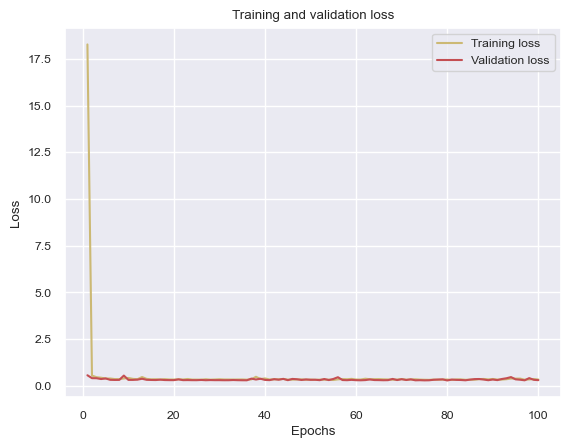

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

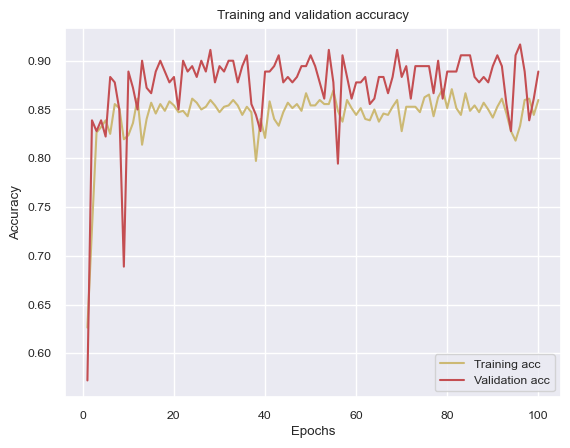

In [47]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        97
           1       0.91      0.84      0.88        83

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180

[[90  7]
 [13 70]]
